# 1. Import and Install Dependencies

## 1.1 Install Dependencies

In [3]:
!pip install tensorflow==2.6.2 tensorflow-gpu==2.6.2 tensorflow_io==0.21.0 matplotlib

Defaulting to user installation because normal site-packages is not writeable


## 1.2 Load Dependencies

In [2]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio

# 2. Build Data Loading Function

## 2.1 Define Paths to Files

In [6]:
BREATH_FILE = os.path.join('data','breaths','how_to_find_breaths-02.wav')
NON_BREATH_FILE = os.path.join('data','non-breaths','how_to_find_non_breath-0.wav')

## 2.2 Build Dataloading Function

In [7]:
def load_wav_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    return wav

## 2.3 Plot Wave

In [8]:
wave = load_wav_mono(BREATH_FILE)
nwave = load_wav_mono(NON_BREATH_FILE)

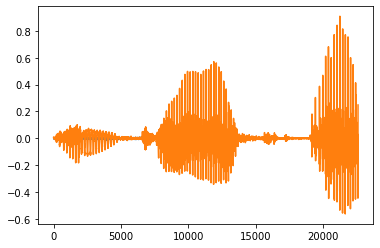

In [9]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

# 3. Create Tensorflow Dataset

## 3.1 Define Paths to Positive and Negative Data

In [10]:
POS = os.path.join('data','breaths')
NEG = os.path.join('data','non-breaths')
POS

'data/breaths'

## 3.2 Create Tensorflow Datasets

In [11]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

## 3.3 Add labels and Combine Positive and Negative Samples

In [12]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [20]:
data.shuffle(10000).as_numpy_iterator().next()

(b'data/non-breaths/how_to_find_non_breath-183.wav', 0.0)

# 4. Determine Average Length of a Breath

## 4.1 Calculate Wave Cycle Length

In [22]:
lengths = []
for file in os.listdir(os.path.join('data','breaths')):
    tensor_wave = load_wav_mono(os.path.join('data','breaths', file))
    lengths.append(len(tensor_wave))

In [23]:
os.listdir(os.path.join('data','breaths'))

['how_to_find_breaths-297.wav',
 'sleep_science_breaths-576.wav',
 'sleep_science_breaths-228.wav',
 'sleep_science_breaths-468.wav',
 'holiday_breaths-78.wav',
 'sleep_science_breaths-688.wav',
 'how_to_find_breaths-346.wav',
 'sleep_science_breaths-546.wav',
 'holiday_breaths-41.wav',
 'sleep_science_breaths-461.wav',
 'sleep_science_breaths-528.wav',
 'favorites_breaths-38.wav',
 'sleep_science_breaths-711.wav',
 'holiday_breaths-139.wav',
 'sleep_science_breaths-407.wav',
 'holiday_breaths-31.wav',
 'how_to_find_breaths-228.wav',
 'sleep_science_breaths-157.wav',
 'favorites_breaths-257.wav',
 'how_to_find_breaths-138.wav',
 'sleep_science_breaths-743.wav',
 'favorites_breaths-236.wav',
 'how_to_find_breaths-36.wav',
 'how_to_find_breaths-159.wav',
 'sleep_science_breaths-118.wav',
 'how_to_find_breaths-313.wav',
 'holiday_breaths-60.wav',
 'sleep_science_breaths-303.wav',
 'favorites_breaths-107.wav',
 'holiday_breaths-52.wav',
 'favorites_breaths-255.wav',
 'how_to_find_breaths-1

In [11]:
lengths

[15108,
 8915,
 10138,
 18737,
 16646,
 17120,
 12701,
 11242,
 6312,
 10769,
 13925,
 23668,
 16804,
 29111,
 22010,
 25797,
 18264,
 17513,
 25324,
 8205,
 16015,
 7810,
 17159,
 17672,
 16764,
 11558,
 13254,
 8481,
 9309,
 13254,
 20787,
 8835,
 11834,
 14161,
 18106,
 10926,
 11163,
 18816,
 20906,
 14082,
 17593,
 9152,
 14437,
 9309,
 16291,
 11084,
 5956,
 14398,
 16883,
 14239,
 19131,
 24811,
 14003,
 8915,
 9743,
 13530,
 22562,
 19841,
 11439,
 9743,
 12031,
 11123,
 12504,
 17277,
 18539,
 22129,
 11676,
 12070,
 15265,
 11202,
 10730,
 26626,
 26626,
 14319,
 11716,
 23825,
 9822,
 24890,
 7415,
 14634,
 11163,
 11873,
 12071,
 7810,
 15699,
 14043,
 13017,
 12188,
 21143,
 23036,
 12149,
 16015,
 17948,
 17277,
 19723,
 12899,
 31635,
 26862,
 14082,
 11755,
 14635,
 9821,
 8087,
 12228,
 6784,
 12819,
 26784,
 24811,
 25048,
 8559,
 11006,
 28755,
 16646,
 9861,
 26153,
 10848,
 18855,
 15541,
 21971,
 8402,
 8481,
 8876,
 8994,
 19249,
 14042,
 9546,
 12623,
 9231,
 24

## 4.2 Calculate Mean, Min and Max

In [12]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=15332>

In [13]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=5286>

In [14]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=33055>

In [29]:
BREATH_LENGTH=33055
SAMPLE_RATE=44100

# 5. Build Preprocessing Function to Convert to Spectrogram

## 5.1 Build Preprocessing Function

In [16]:
!pip install colorama==0.3.9

Defaulting to user installation because normal site-packages is not writeable


In [25]:
import librosa
import librosa.display

In [26]:
def mel_preprocess(file_path, label): 
    samples, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    spectrogram = librosa.stft(samples)
    sgram_mag, _ = librosa.magphase(spectrogram)
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=SAMPLE_RATE)
    # Make mel spectrogram more readable
    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram)
    # Increase spectrogram dimensions
    #librosa.util.expand_to(mel_sgram, ndim=4, axes=[1,2])
    #mel_scale_sgram = tf.expand_dims(mel_scale_sgram, axis=2)
    return mel_sgram, label

## 5.2 Test Out the Function and Visualize Mel Spectrogram

In [27]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [30]:
spectrogram, label = mel_preprocess(filepath, label)

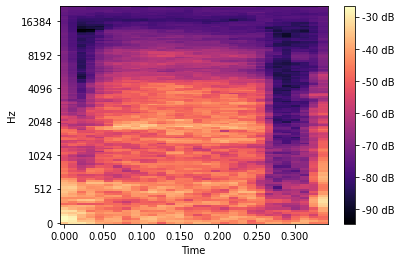

In [31]:
#Display mel spectrogram
librosa.display.specshow(spectrogram, sr=44100, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

# 6. Create Training and Testing Partitions

## 6.1 Create a Tensorflow Data Pipeline

In [474]:
filepath, label = data.shuffle(buffer_size=10000).as_numpy_iterator().next()
librosa.load(filepath, sr=41000)

(array([0.00113555, 0.00135254, 0.0013533 , ..., 0.00602284, 0.00759717,
        0.        ], dtype=float32),
 41000)

In [55]:
type(data.Dataset)

AttributeError: 'ConcatenateDataset' object has no attribute 'dataset'

In [31]:
data = data.map(mel_preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

TypeError: in user code:

    <ipython-input-18-db9e8d1943aa>:2 mel_preprocess  *
        samples, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    /home/jrodriguez/.local/lib/python3.6/site-packages/librosa/util/decorators.py:51 inner_f  *
        return f(*args, **kwargs)
    /home/jrodriguez/.local/lib/python3.6/site-packages/librosa/core/audio.py:164 load  *
        y, sr_native = __soundfile_load(path, offset, duration, dtype)
    /home/jrodriguez/.local/lib/python3.6/site-packages/librosa/core/audio.py:195 __soundfile_load  *
        context = sf.SoundFile(path)
    /home/jrodriguez/.local/lib/python3.6/site-packages/soundfile.py:655 __init__  **
        self._file = self._open(file, mode_int, closefd)
    /home/jrodriguez/.local/lib/python3.6/site-packages/soundfile.py:1209 _open
        raise TypeError("Invalid file: {0!r}".format(self.name))

    TypeError: Invalid file: <tf.Tensor 'args_0:0' shape=() dtype=string>


## 6.2 Split into Training and Testing Partitions

In [509]:
len(data)

748

In [415]:
train = data.take(33)
test = data.skip(33).take(14)

## 6.3 Test One Batch

In [436]:
samples, labels = train.as_numpy_iterator().next()

In [479]:
samples.shape

(16, 128, 21)

# 7. Build Deep Learning Model

## 7.1 Load Tensorflow Dependencies

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

## 7.2 Build Sequential Model, Compile and View Summary

In [34]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1023, 257, 1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [40]:
import datetime
from keras.callbacks import ModelCheckpoint

In [48]:
# Create tensorflow stats and callbacks
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=100,
    verbose=0,
    mode='min',
    baseline=None,
    restore_best_weights=True,
)
model_path = os.path.join('output_model_checkpoints')
checkpoint_callback = ModelCheckpoint(filepath=model_path,
                                     monitor='val_loss',
                                     verbose=0,
                                     save_best_only=True,
                                     mode='min')

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1021, 255, 16)     160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1019, 253, 16)     2320      
_________________________________________________________________
flatten (Flatten)            (None, 4124912)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               527988864 
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 527,991,473
Trainable params: 527,991,473
Non-trainable params: 0
_________________________________________________________________


## 7.3 Fit Model, View Loss and KPI Plots

In [50]:
hist = model.fit(train, epochs=1000, validation_data=test, callbacks=[tensorboard_callback, checkpoint_callback])

Epoch 1/1000
33/33 [==============================] - 144s 4s/step - loss: 0.0442 - recall: 1.0000 - precision: 0.9779 - val_loss: 0.0304 - val_recall: 1.0000 - val_precision: 0.9826
INFO:tensorflow:Assets written to: output_model_checkpoints/assets
Epoch 2/1000
33/33 [==============================] - 143s 4s/step - loss: 0.0341 - recall: 1.0000 - precision: 0.9780 - val_loss: 0.0147 - val_recall: 1.0000 - val_precision: 0.9917
INFO:tensorflow:Assets written to: output_model_checkpoints/assets
Epoch 3/1000
33/33 [==============================] - 149s 5s/step - loss: 0.0376 - recall: 1.0000 - precision: 0.9659 - val_loss: 0.0340 - val_recall: 1.0000 - val_precision: 0.9829
Epoch 4/1000
33/33 [==============================] - 145s 4s/step - loss: 0.0259 - recall: 1.0000 - precision: 0.9764 - val_loss: 0.0154 - val_recall: 1.0000 - val_precision: 0.9900
Epoch 5/1000
33/33 [==============================] - 147s 4s/step - loss: 0.0204 - recall: 1.0000 - precision: 0.9786 - val_loss: 0.0

Epoch 87/1000
33/33 [==============================] - 145s 4s/step - loss: 0.0039 - recall: 1.0000 - precision: 1.0000 - val_loss: 6.8231e-04 - val_recall: 1.0000 - val_precision: 1.0000
INFO:tensorflow:Assets written to: output_model_checkpoints/assets
Epoch 88/1000
33/33 [==============================] - 147s 4s/step - loss: 0.0037 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0016 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 89/1000
33/33 [==============================] - 139s 4s/step - loss: 0.0135 - recall: 1.0000 - precision: 0.9962 - val_loss: 0.0077 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 90/1000
33/33 [==============================] - 139s 4s/step - loss: 0.0042 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0037 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 91/1000
33/33 [==============================] - 142s 4s/step - loss: 0.0023 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0041 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 92/

33/33 [==============================] - 142s 4s/step - loss: 1.3977e-05 - recall: 1.0000 - precision: 1.0000 - val_loss: 3.4008e-05 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 170/1000
33/33 [==============================] - 140s 4s/step - loss: 1.8843e-05 - recall: 1.0000 - precision: 1.0000 - val_loss: 1.0927e-05 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 171/1000
33/33 [==============================] - 141s 4s/step - loss: 1.7909e-05 - recall: 1.0000 - precision: 1.0000 - val_loss: 1.9983e-05 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 172/1000
33/33 [==============================] - 142s 4s/step - loss: 1.3102e-05 - recall: 1.0000 - precision: 1.0000 - val_loss: 1.8190e-05 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 173/1000
33/33 [==============================] - 143s 4s/step - loss: 1.8828e-05 - recall: 1.0000 - precision: 1.0000 - val_loss: 9.0364e-06 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 174/1000
33/33 [============================

KeyboardInterrupt: 

NameError: name 'hist' is not defined

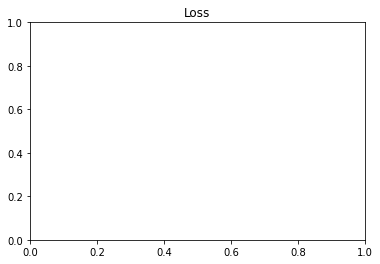

In [51]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

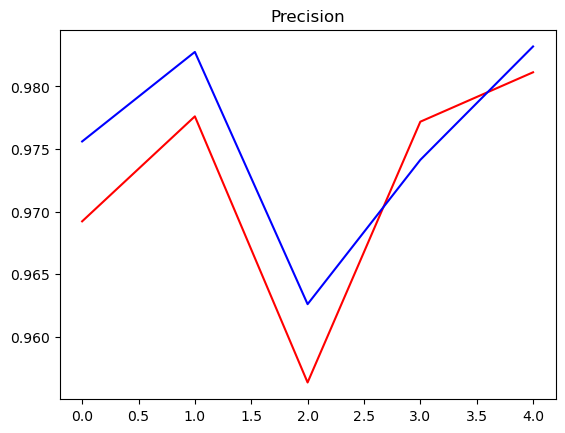

In [75]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

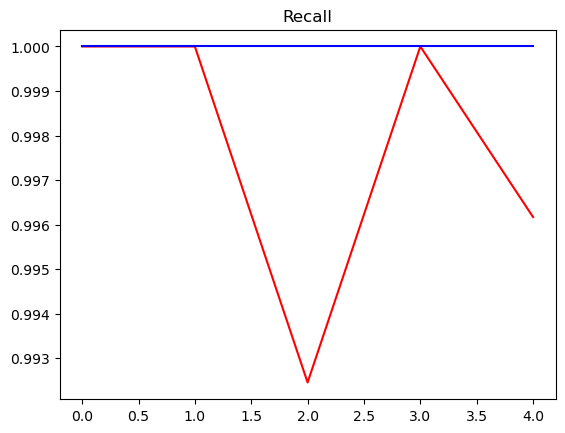

In [76]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

## 7.4 Display Tensorflow Stats

In [52]:
%load_ext tensorboard

In [53]:
%tensorboard --logdir logs/gradient_tape

# 8. Make a Prediction on a Single Clip

## 8.1 Get One Batch and Make a Prediction

In [79]:
X_test, y_test = test.as_numpy_iterator().next()

In [81]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 72ms/step


## 8.2 Convert Logits to Classes 

In [82]:
yhat = [1 if prediction > 0.95 else 0 for prediction in yhat]

# 9. Build Podcast Parsing Functions

## 9.1 Load up MP3s

In [512]:
def load_mp3_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels 
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2 
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    #wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [513]:
mp3 = os.path.join('data', 'podcasts', 'How to find.mp3')

In [514]:
wav = load_mp3_mono(mp3)

In [534]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=5562, sequence_stride=5562, batch_size=1)

In [535]:
samples, index = audio_slices.as_numpy_iterator().next()

## 9.2 Build Function to Convert Clips into Windowed Spectrograms

In [536]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([BREATH_LENGTH] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [495]:
def mel_preprocess_mp3(sample, index): 
    sample = sample[0]
    zero_padding = tf.zeros([BREATH_LENGTH] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = librosa.stft(sample)
    sgram_mag, _ = librosa.magphase(spectrogram)
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=SAMPLE_RATE)
    # Make mel spectrogram more readable
    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram)
    # Increase spectrogram dimensions
    #librosa.util.expand_to(mel_sgram, ndim=4, axes=[1,2])
    return mel_sgram

## 9.3 Convert Longer Clips into Windows and Make Predictions

In [538]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=5562, sequence_stride=5562, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [511]:
myModel = tf.keras.models.load_model(os.path.join("output_model_checkpoints"))

In [539]:
yhat = myModel.predict(audio_slices)
yhat = [1 if prediction > 0.95 else 0 for prediction in yhat]
yhat

[0, 0, 0, 1, 1]

## 9.4 Group Consecutive Detections

In [506]:
from itertools import groupby

In [541]:
yhat = [key for key, group in groupby(yhat)]
breaths = tf.math.reduce_sum(yhat).numpy()

In [542]:
breaths

1

# 10. Make Predictions

## 10.1 Loop over all recordings and make predictions

In [543]:
results = {}
for file in os.listdir(os.path.join('data', 'podcasts')):
    FILEPATH = os.path.join('data','podcasts', file)
    
    wav = load_mp3_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=5562, sequence_stride=5562, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    
    yhat = myModel.predict(audio_slices)
    
    results[file] = yhat

In [98]:
results

{'Create your own holiday.mp3': array([[0.9925349 ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.99260396]], dtype=float32),
 'Favorites.mp3': array([[9.916103e-01],
        [0.000000e+00],
        [0.000000e+00],
        ...,
        [0.000000e+00],
        [0.000000e+00],
        [7.322384e-23]], dtype=float32),
 'How to find.mp3': array([[7.3219691e-22],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [4.3977255e-21],
        [2.5783234e-12],
        [9.9088752e-01]], dtype=float32),
 'SLEEP SCIENCE TRIMMED.mp3': array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], dtype=float32)}

## 10.2 Convert Predictions into Classes

In [544]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.95 else 0 for prediction in logits]
class_preds

{'How to find.mp3': [0, 0, 0, 1, 1],
 'Favorites.mp3': [0, 0, 0, 1, 1],
 'SLEEP SCIENCE TRIMMED.mp3': [0, 0, 0, 1, 1],
 'Create your own holiday.mp3': [0, 0, 0, 1, 1]}

## 10.3 Group Consecutive Detections

In [545]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

{'How to find.mp3': 1,
 'Favorites.mp3': 1,
 'SLEEP SCIENCE TRIMMED.mp3': 1,
 'Create your own holiday.mp3': 1}

# 11. Export Model and Results

In [80]:
import csv

In [81]:
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'no_breaths'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])

In [93]:
model.save('myModel')

INFO:tensorflow:Assets written to: myModel.model\assets


INFO:tensorflow:Assets written to: myModel.model\assets
